In [1]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/explann')

from explann.dataio import ImportData
from explann.models import FactorialModel

In [2]:
table = ImportData("""
Temp;Miles;Wear
53.2;388;2.25847
53.2;388;2.19915
53.2;388;2.19068
53.2;388;1.99153
53.3;438;2.27837
53.3;438;2.22698
53.3;438;2.03854
53.3;438;2.05139
66;58;2.68891
66;58;2.63003
66;58;2.59078
66;58;2.58587
70.3;7;2.35556
70.3;7;2.41333
70.3;7;2.34222
70.3;7;2.42667
76.9;28;2.15361
76.9;28;2.20181
76.9;28;2.22892
76.9;28;2.16867
78.4;25;2.09884
78.4;25;2.25
78.4;25;2.0436
78.4;25;2.08721
88.1;275;2.07979
88.1;275;2.23404
88.1;275;2.07713
88.1;275;2.21011
89.6;324;2.01934
89.6;324;2.26796
89.6;324;2.10221
89.6;324;2.01105
""")

In [29]:
from statsmodels.formula.api import ols,gls,rlm
fm = FactorialModel(
    data=table.data, 
    functions={
        "Model_1": "Wear ~ Temp + Miles",
        "Model_2": "Wear ~ Temp*Miles + np.power(Temp,2) + np.power(Miles,2)",
        "Model_3": "Wear ~ Temp*Miles + np.power(Miles,2)",
        "Model_4": "Wear ~ Temp*Miles + Miles^2"},
    statsmodel=ols
)

In [35]:
fm.summary()

{'Model_1': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   Wear   R-squared:                       0.344
 Model:                            OLS   Adj. R-squared:                  0.299
 Method:                 Least Squares   F-statistic:                     7.600
 Date:                Tue, 11 Jul 2023   Prob (F-statistic):            0.00222
 Time:                        12:34:53   Log-Likelihood:                 15.292
 No. Observations:                  32   AIC:                            -24.58
 Df Residuals:                      29   BIC:                            -20.19
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

In [36]:
fm.lack_of_fit()

{'Model_1':   Source_of_Variation      df  sum_sq  mean_sq       F  F_table      p
 0          Regression  2.0000  0.3776   0.1888  7.6005   3.3277 0.0022
 1            Residual 29.0000  0.7204   0.0248     NaN      NaN    NaN
 2         Lack_of_Fit  5.0000  0.5321   0.1064 13.5582   2.6207 0.0000
 3          Pure_Error 24.0000  0.1884   0.0078     NaN      NaN    NaN
 4               Total 31.0000  1.0981      NaN     NaN      NaN    NaN,
 'Model_2':   Source_of_Variation      df  sum_sq  mean_sq       F  F_table      p
 0          Regression  5.0000  0.9027   0.1805 24.0257   2.5868 0.0000
 1            Residual 26.0000  0.1954   0.0075     NaN      NaN    NaN
 2         Lack_of_Fit  2.0000  0.0070   0.0035  0.4464   3.4028 0.6451
 3          Pure_Error 24.0000  0.1884   0.0078     NaN      NaN    NaN
 4               Total 31.0000  1.0981      NaN     NaN      NaN    NaN,
 'Model_3':   Source_of_Variation      df  sum_sq  mean_sq       F  F_table      p
 0          Regression  4.000

{'Model_1': <Axes: >,
 'Model_2': <Axes: >,
 'Model_3': <Axes: >,
 'Model_4': <Axes: >}

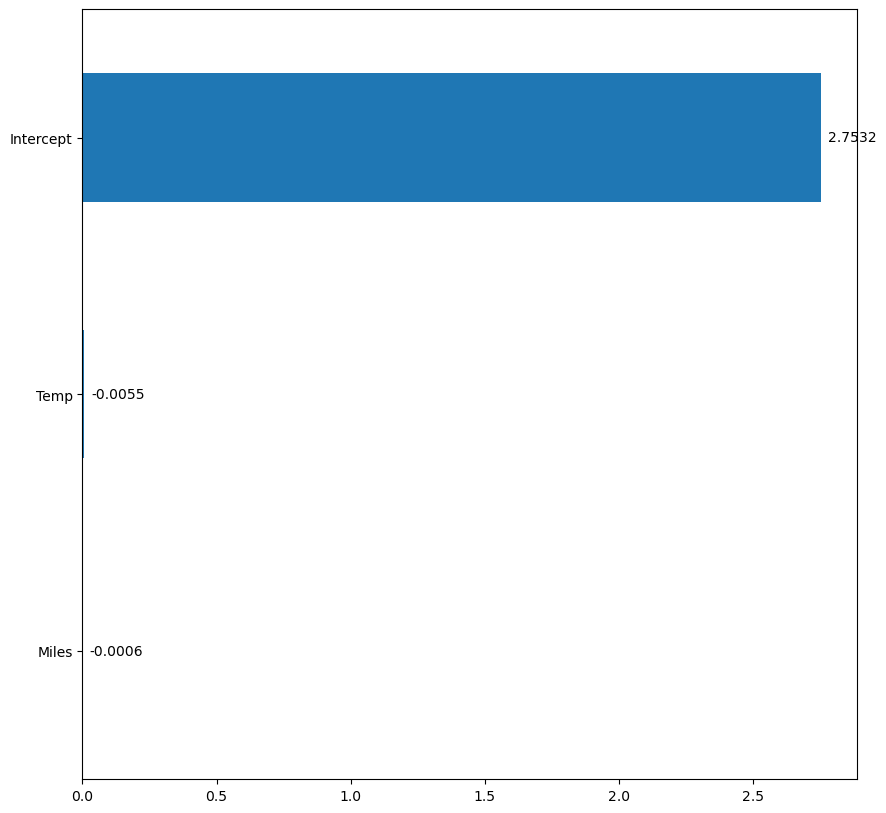

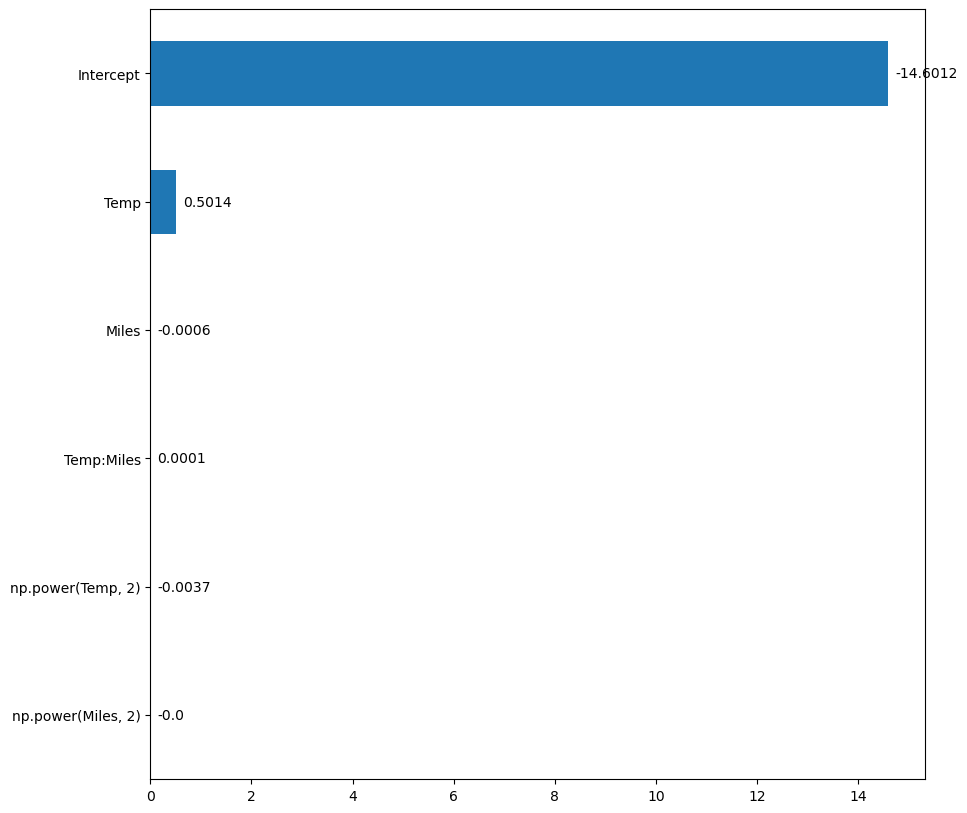

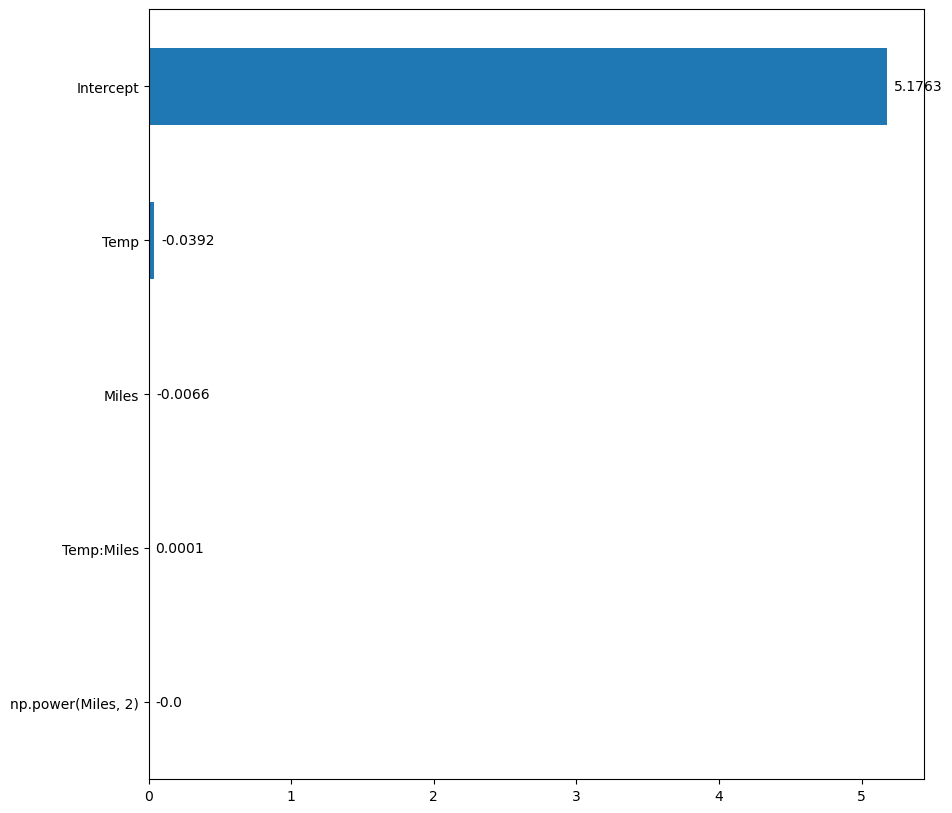

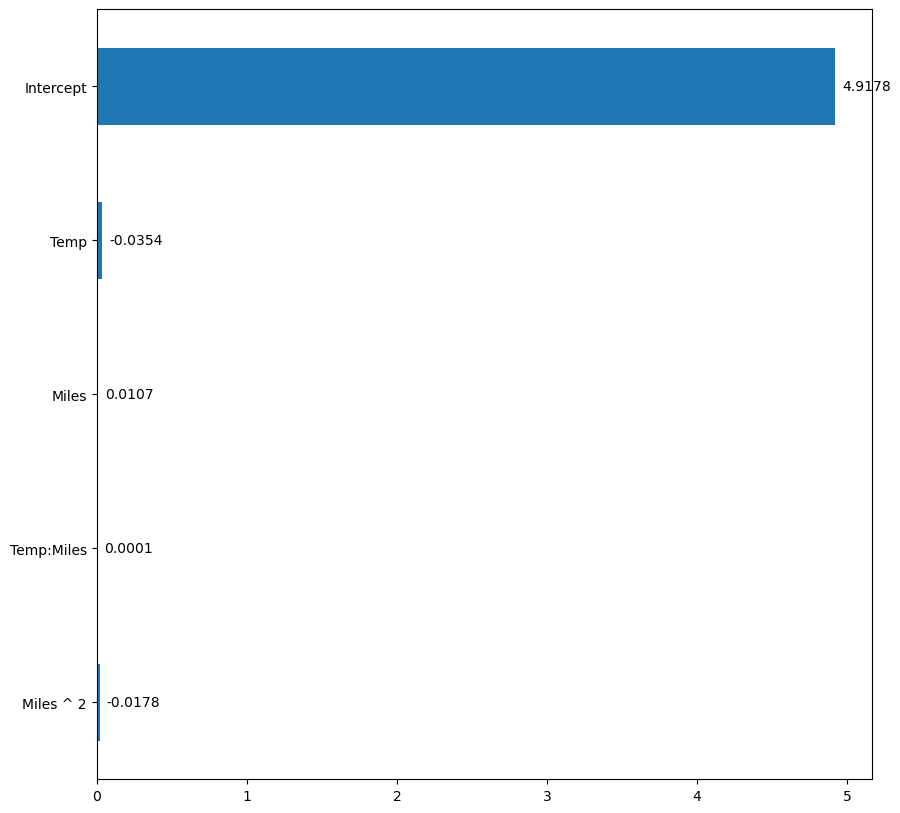

In [31]:
fm.pareto_plot()

In [28]:
abs(fm["Model_1"].params)

Intercept   2.7532
Temp        0.0055
Miles       0.0006
dtype: float64

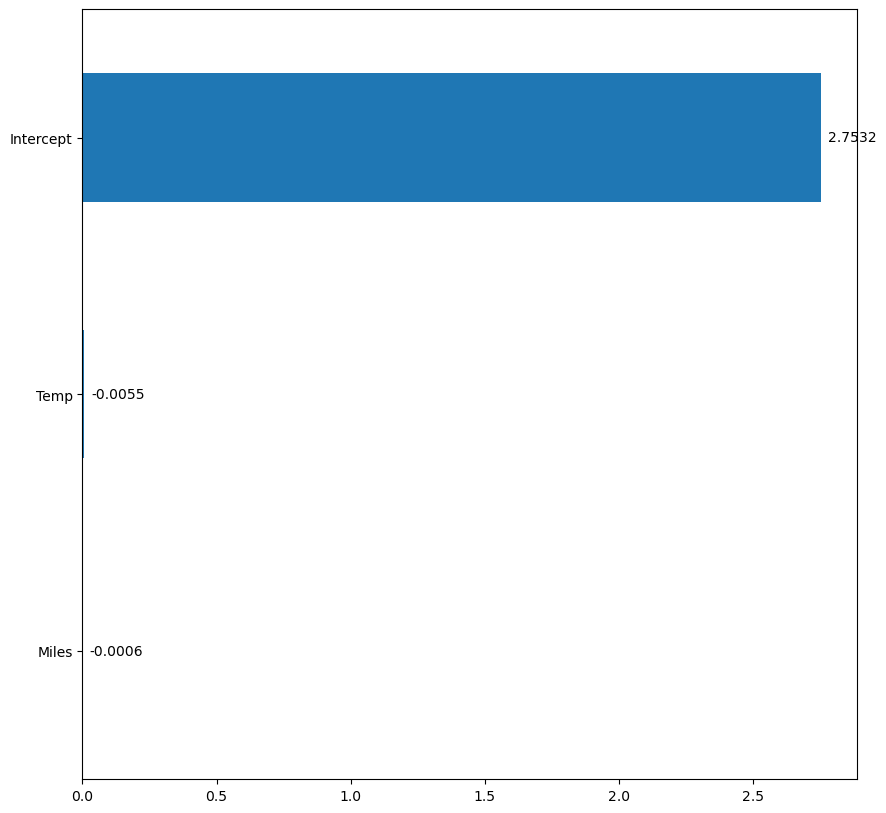

In [7]:
ax = abs(fm['Model_1'].params)[::-1].plot(kind='barh', figsize=(10,10))
blabels = ax.bar_label(ax.containers[0], labels=fm['Model_1'].params[::-1].round(4).astype(str).values, padding=5)

In [8]:
fm['Model_1'].bse

Intercept    0.175607
Temp         0.002229
Miles        0.000172
dtype: float64

In [9]:
dir(fm['Model_1'])

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influe

In [10]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

fm['Model_2'].anova()

AttributeError: 'OLSResults' object has no attribute 'anova'

In [ ]:
sig_fm = fm.build_significant_models(pvalue=0.05)

In [ ]:
sig_fm.lack_of_fit(baseline=fm)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

mu, std = stats.norm.fit(fm['Model_1'].resid)

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=fm['Model_1'].resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [ ]:
sns.boxplot(x=fm['Model_1'].resid, showmeans=True);

In [ ]:
sm.qqplot(fm['Model_1'].resid, line='s');

In [ ]:
import pingouin as pg

ax = pg.qqplot(fm['Model_1'].resid, dist='norm', confidence=.95)

In [ ]:
sns.jointplot(data=fm.data, x="Temp", y="Miles", hue="Wear")

In [ ]:
sns.pairplot(data=fm.data, hue="Wear")